<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA15_16_%E7%94%A8_CNN_%E5%81%9A%E5%9C%96%E5%BD%A2%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

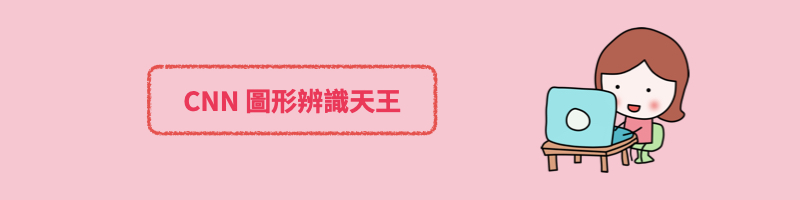

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

### 1. 讀入 CIFAR-10 數據集

CIFAR-10 是一個小尺吋（32x32）彩色圖片資料集，其中，訓練集包含了 50000 張大小為 32x32 的彩色圖片；測試集包含了 10000 張大小為 32x32 的彩色圖片。CIFAR-10 的圖片資料可分為以下 10 個種類：
* 飛機 (airplan)
* 交通工具 (automobile)
* 鳥 (bird)
* 貓 (cat)
* 鹿 (deer)
* 狗 (dog)
* 青蛙 (frog)
* 馬 (horse)
* 船 (ship)
* 卡車 (truck)

在這裡，我們將讓大家練習建構在 CIFAR-10 上的 CNN 分類模型


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. 資料整理

#### 資料尺寸與通道數（Channel）

由於 CNN 模型的輸入資料必須是圖片，所以我們需要注意一張圖有多少個 channel。

因為CIFAR-10資料集的資料為彩色圖片，每一個像素點，其實包含了紅色（Red）、綠色（Green）以及藍色（Blue）三原色的強度，所以每一張圖有三個 channel，以及代表三種顏色的強度。

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
print(f"資料的最小值: {np.min(x_train)}")
print(f"資料的最大值: {np.max(x_train)}")

資料的最小值: 0
資料的最大值: 255


In [7]:
print(f"資料的最小值: {np.min(x_test)}")
print(f"資料的最大值: {np.max(x_test)}")

資料的最小值: 0
資料的最大值: 255


In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
y_train.shape

(50000, 10)

### 3. step 1: 打造函數學習機 (CNN)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(32, 32, 3), 
                 activation='relu'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
Total params: 1,216
Trainable params: 1,216
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(MaxPool2D())

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
Total params: 1,216
Trainable params: 1,216
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))

In [17]:
model.add(MaxPool2D())

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
Total params: 14,048
Trainable params: 14,048
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D())

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [21]:
model.add(Flatten())

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [23]:
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

#### 看一下我們的神經網路

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

#### 組裝

In [25]:
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

### 4. step 2: fit

In [26]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
500/500 [==============================] - 15s 5ms/step - loss: 0.0727 - accuracy: 0.3995
Epoch 2/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0591 - accuracy: 0.5423
Epoch 3/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0516 - accuracy: 0.6089
Epoch 4/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0464 - accuracy: 0.6557
Epoch 5/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0425 - accuracy: 0.6900
Epoch 6/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0392 - accuracy: 0.7168
Epoch 7/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0366 - accuracy: 0.7366
Epoch 8/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0340 - accuracy: 0.7595
Epoch 9/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0324 - accuracy: 0.7737
Epoch 10/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0308 - accuracy: 0.785

### 5. Step 3: 預測

In [27]:
x_test[5].shape

(32, 32, 3)

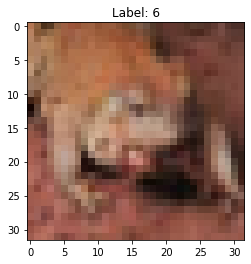

In [28]:
plt.imshow(x_test[5])
plt.title(f"Label: {y_test[5].argmax()}");

In [29]:
inp = x_test[5].reshape(1, 32, 32, 3)

In [30]:
model.predict(inp)

array([[5.0167055e-05, 2.5114240e-04, 1.4457746e-03, 1.4229506e-01,
        3.9188229e-03, 2.1276698e-02, 8.3047658e-01, 1.6534079e-07,
        1.9349174e-04, 9.2166149e-05]], dtype=float32)

In [31]:
np.argmax(model.predict(inp), axis=-1)

array([6])

In [32]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

神經網路預測是: 6


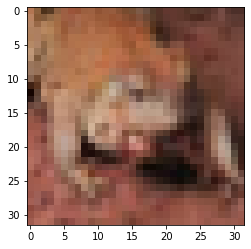

In [33]:
n = 5
 
print('神經網路預測是:', y_predict[n])
plt.imshow(x_test[n], cmap='Greys');

In [34]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0443 - accuracy: 0.7071


In [35]:
print(f"loss: {score[0]}")
print(f"正確率: {score[1]*100:.2f}%")

loss: 0.04434654489159584
正確率: 70.71%


### 6. 更酷炫的互動呈現

我們先來準備標籤資料的中英文對照

In [36]:
from ipywidgets import interact_manual

In [37]:
class_name = ['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']

In [38]:
def test(測試編號):
    plt.imshow(x_test[測試編號], cmap='Greys')
    print('神經網路判斷為:', class_name[y_predict[測試編號]])

In [39]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

到底測試資料整體的表現如何呢？我們可以給神經網路「總評量」。

In [41]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0443 - accuracy: 0.7071


In [42]:
print(f"loss: {score[0]}")
print(f" 正確率 : {score[1]*100:.2f}%")

loss: 0.04434654489159584
 正確率 : 70.71%
